# Linear Regression - Usando a Equação e SGD

Paulo Cysne Rios Jr. | Novembro 2017

Neste exemplo faremos uma comparação dos diferentes métodos de regressão linear.

Faça o pequeno exercício ao final deste exemplo.

In [1]:
import numpy as np

## 1. Criando a função real com números aleatórios

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X  # sem ruído

In [3]:
y = 4 + 3 * X + np.random.randn(100, 1) # com ruído

In [4]:
X[:5]

array([[ 0.0957001 ],
       [ 0.09544842],
       [ 0.5755501 ],
       [ 1.58978236],
       [ 1.08392643]])

In [5]:
y[:5]

array([[ 3.9477764 ],
       [ 2.65989365],
       [ 7.42319971],
       [ 8.44078775],
       [ 8.5216795 ]])

In [6]:
import matplotlib.pyplot as plt

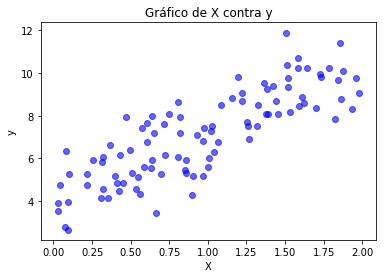

In [8]:
plt.scatter(X, y, color = "blue", alpha = 0.6)
plt.title("Gráfico de X contra y")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

## 2. Usando a equação de custo minimizado

### 2.1 Calculando os coeficientes

In [9]:
# Acrescente x0 = 1 para cada instância
X_b = np.c_[np.ones((100, 1)), X]

In [10]:
X_b[:5]

array([[ 1.        ,  0.0957001 ],
       [ 1.        ,  0.09544842],
       [ 1.        ,  0.5755501 ],
       [ 1.        ,  1.58978236],
       [ 1.        ,  1.08392643]])

In [13]:
# Usando a equação para custo minimizado
theta_best_formula = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [14]:
theta_best_formula

array([[ 4.1029318 ],
       [ 3.12568021]])

### 2.2 Fazendo predições com o modelo

In [15]:
X_new = np.array([[0], [2]])

In [16]:
X_new

array([[0],
       [2]])

In [17]:
# Acrescente um para cada instância
X_new_b = np.c_[np.ones((2, 1)), X_new]

In [18]:
X_new_b

array([[ 1.,  0.],
       [ 1.,  2.]])

In [19]:
y_predict = X_new_b.dot(theta_best)

In [20]:
y_predict

array([[  4.1029318 ],
       [ 10.35429222]])

### 2.3 Plotando as predições do modelo

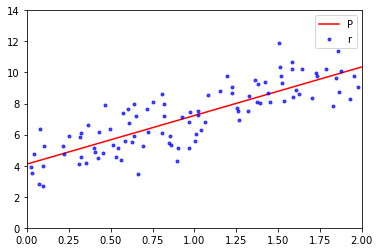

In [21]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.", alpha = 0.7)
plt.axis([0, 2, 0, 14])
plt.legend("Predictions")
plt.show()

## 3. Usando Scikit-Learn

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lg = LinearRegression()

In [24]:
lg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
theta_best_LR_class = lg.intercept_, lg.coef_

In [26]:
theta_best_LR_class

(array([ 4.1029318]), array([[ 3.12568021]]))

### 3.1 Fazendo predições

In [27]:
lg.predict(X_new)

array([[  4.1029318 ],
       [ 10.35429222]])

## 4. Usando Batch Gradient Descent

In [28]:
eta = 0.1 # taxa de aprendizagem
n_iterations = 1000
m = 100

In [29]:
# Iniciação de theta aleatória
theta = np.random.randn(2,1)

In [30]:
theta

array([[-1.30112208],
       [-0.30899155]])

In [31]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) 
    theta = theta - eta * gradients

In [32]:
theta_batch_gd = theta

In [33]:
theta_batch_gd

array([[ 4.1029318 ],
       [ 3.12568021]])

Valores de theta são os mesmos obtidos pela equação de minimização!

## 5. Usando Stochastic Gradient Descent (Descida de Gradiente Estocástica)

In [34]:
n_epochs = 50
t0, t1 = 5, 50 # hiperparameteros do plano de aprendizagem

In [35]:
def learning_schedule(t): 
    return t0/(t+t1)

In [36]:
theta = np.random.randn(2,1) # inicialização aleatória

In [37]:
for epoch in range(n_epochs): 
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [38]:
theta_stochastic_gd = theta

In [39]:
theta_stochastic_gd

array([[ 4.11576352],
       [ 3.15661166]])

Enquanto o código Batch Gradient Descent iterou 1000 vezes através de todo o conjunto de treinamentos, este código passa pelo conjunto de treinamento apenas 50 vezes e atinge uma solução bastante boa!

## 6. Usando Stochastic Gradient Descent com Scikit-Learn

In [40]:
from sklearn.linear_model import SGDRegressor

In [41]:
sgd_m = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)

In [42]:
sgd_m.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=50, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [44]:
theta_SGDRegressor_class = sgd_m.intercept_, sgd_m.coef_

In [45]:
theta_SGDRegressor_class

(array([ 4.14597447]), array([ 3.17288583]))

## 7. Comparação

In [46]:
theta_best_formula

array([[ 4.1029318 ],
       [ 3.12568021]])

In [47]:
theta_best_LR_class

(array([ 4.1029318]), array([[ 3.12568021]]))

In [48]:
theta_batch_gd

array([[ 4.1029318 ],
       [ 3.12568021]])

In [49]:
theta_stochastic_gd

array([[ 4.11576352],
       [ 3.15661166]])

In [50]:
theta_SGDRegressor_class

(array([ 4.14597447]), array([ 3.17288583]))

## 8. Exercício

- Coloque os resultados acima numa tabela
- Análise os resultados e faça uma comparação dos diferentes métodos.